# **1. Importando as bibliotecas necessárias**

In [55]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from scikeras.wrappers import KerasClassifier  # pip install scikeras

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder


# **2. Análise exploratória dos dados**

In [46]:
# carregando o dataset
wine_df = pd.read_csv('wine.csv')
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [47]:
# verificando as dimensões do dataset
wine_df.shape

(178, 14)

In [48]:
# Verificando informações adicionais do dataset
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [49]:
# Estatística Descritiva das Variáveis
wine_df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [50]:
# Verificando se há linhas duplicadas
wine_df.duplicated().sum()

0

In [51]:
# Verificando se há valores Missing (valores ausentes) dos vinhos
wine_df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [56]:
# Trocando o tipo do atributo Wine por um tipo numérico
label_encoder = LabelEncoder()
wine_df['Wine'] = label_encoder.fit_transform(wine_df['Wine'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


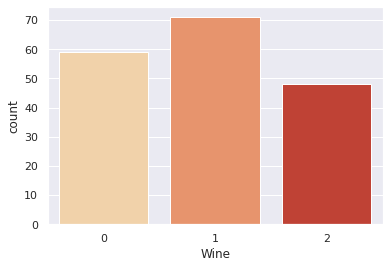

In [57]:
# Criando um Gráfico de Barras para  mostrar a frequência da Variável "Wine" (Nossa Classe a ser Predita)
sns.set_theme(style='darkgrid')
sns.countplot(wine_df['Wine'], palette='OrRd')

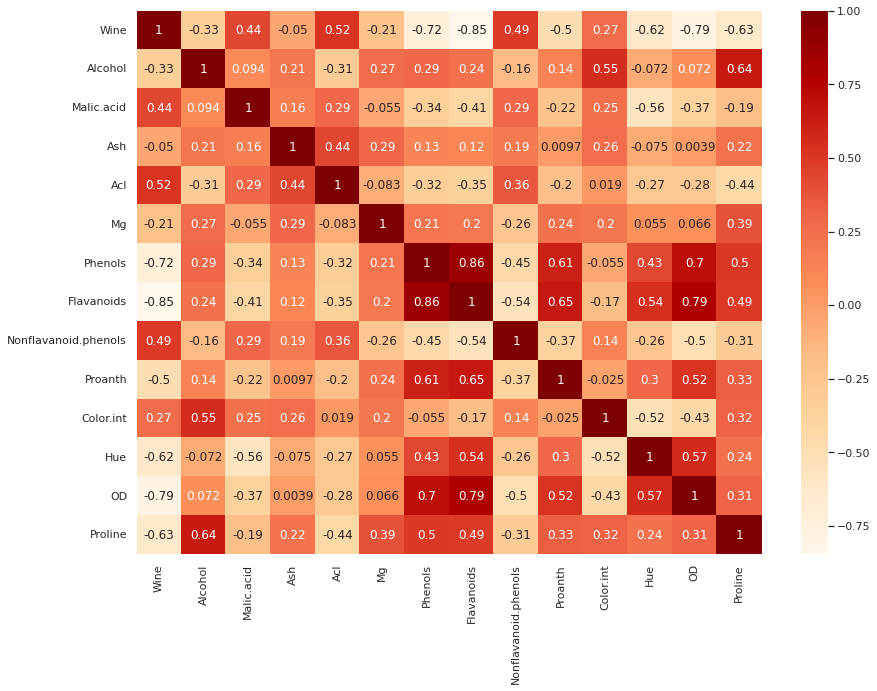

In [65]:
# Verificando a correlação entre as variáveis
plt.figure(figsize=(14, 10))
# Criação do Gráfico heatmap
sns.heatmap(wine_df.corr(), annot=True, cmap='OrRd')
plt.show()

# **3. Organizando dados para modelagem**

## **3.1. Dividindo os dados em atributos descritores e atributo de classe (target)**

In [58]:
X = wine_df.iloc[:, 1:]
X.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [59]:
y = wine_df.Wine
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Wine, Length: 178, dtype: int64

## **3.2. Re-escala utilizando máximo e mínimo**

In [60]:
X = (X - X.min())/(X.max()-X.min())

## **3.3. Descobrindo quais são as melhores variáveis**

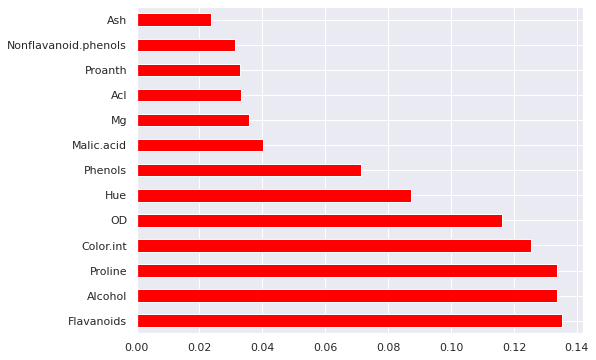

In [61]:
# Usando o ExtraTree  para nos mostrar as Variáveis mais Importantes
modelo = ExtraTreesClassifier()
modelo.fit(X,y)

plt.figure(figsize=(8,6))
melhores = pd.Series(modelo.feature_importances_,index=X.columns)
melhores.nlargest(24).plot(kind='barh', color='red')
plt.show()

In [62]:
#Função para ranquear as 7 mais importantes
melhores.nlargest(7).index

Index(['Flavanoids', 'Alcohol', 'Proline', 'Color.int', 'OD', 'Hue',
       'Phenols'],
      dtype='object')

In [63]:
# Separando as 7 variáveis mais importantes em "X" para que o algoritmo treine com esses dados
X = wine_df[['Flavanoids', 'Alcohol', 'Proline', 'Color.int', 'OD', 'Hue',
       'Phenols']]
X.head()

,Flavanoids,Alcohol,Proline,Color.int,OD,Hue,Phenols
0,3.06,14.23,1065,5.64,3.92,1.04,2.80
1,2.76,13.20,1050,4.38,3.40,1.05,2.65
2,3.24,13.16,1185,5.68,3.17,1.03,2.80
3,3.49,14.37,1480,7.80,3.45,0.86,3.85
4,2.69,13.24,735,4.32,2.93,1.04,2.80


# **4. Prevendo a variável target com redes neurais (Keras)**

In [66]:
# Transformando a variável y em uma matriz binária
y_transformado = np_utils.to_categorical(y)

In [67]:
def Keras_MLP():
	# configurando a rede neural
	model = Sequential()
	model.add(Dense(14, input_dim=7, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# compilando o modelo
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# 7 entradas -> [14 neurônios na camada oculta] -> 3 saídas

## **4.1 Avaliando o modelo com validação cruzada k-Fold**

In [68]:
classificador = KerasClassifier(model=Keras_MLP, epochs=400, batch_size=10, verbose=0)

In [69]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
resultados = cross_val_score(classificador, X, y_transformado, cv=kfold)

In [71]:
print(f'Média: {resultados.mean()*100:.2f}%\nDesvio padrão: {resultados.std()*100:.2f}')

Média: 92.19%
Desvio padrão: 5.08
